<a href="https://colab.research.google.com/github/Gracing47/ABENA/blob/master/GaussianNaiveBayes_75accurancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()


Saving census.csv to census.csv


<Figure size 800x600 with 0 Axes>

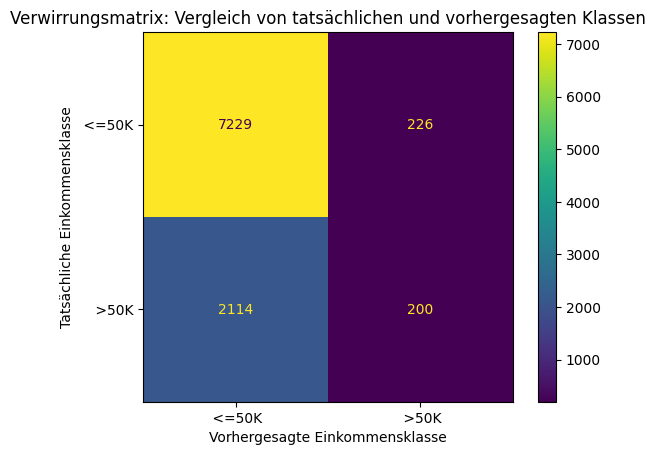

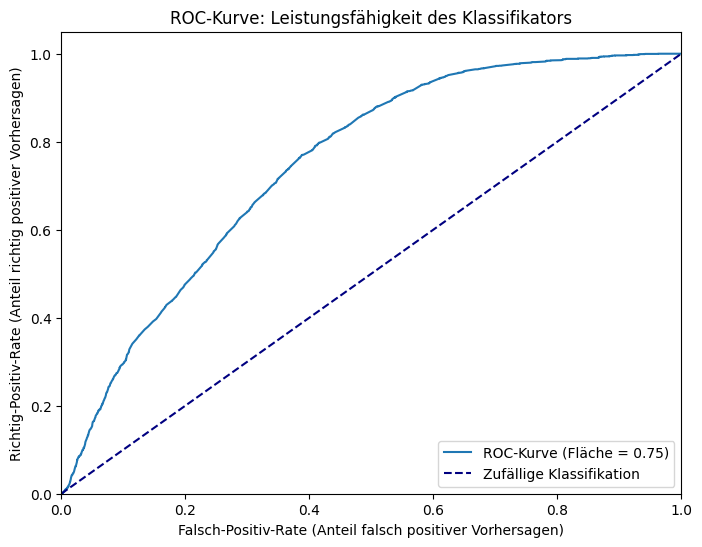

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Schritt 1: Daten laden und vorbereiten
data = pd.read_csv('census.csv')

# Nur die relevanten Spalten
features = ['age', 'hours-per-week']
target = 'target'

X = data[features].values
y = data[target].values

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Schritt 2: Gaussian Naive Bayes implementieren und trainieren
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.parameters[cls] = {
                "prior": X_cls.shape[0] / X.shape[0],
                "mean": X_cls.mean(axis=0),
                "var": X_cls.var(axis=0)
            }

    def gaussian_pdf(self, class_idx, x):
        mean = self.parameters[class_idx]["mean"]
        var = self.parameters[class_idx]["var"]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(self.parameters[cls]["prior"])
                conditional = np.sum(np.log(self.gaussian_pdf(cls, x)))
                posterior = prior + conditional
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

    def predict_proba(self, X):
        y_proba = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(self.parameters[cls]["prior"])
                conditional = np.sum(np.log(self.gaussian_pdf(cls, x)))
                posterior = prior + conditional
                posteriors.append(np.exp(posterior))  # Wahrscheinlichkeit der Klasse
            total = sum(posteriors)
            y_proba.append([p / total for p in posteriors])
        return np.array(y_proba)

# Schritt 3: Modell initialisieren und trainieren
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Schritt 4: Ergebnisse auswerten
# Verwirrungsmatrix (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred, labels=model.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes)

# Bezeichnungen für die Verwirrungsmatrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')
plt.title('Verwirrungsmatrix: Vergleich von tatsächlichen und vorhergesagten Klassen')
plt.xlabel('Vorhergesagte Einkommensklasse')
plt.ylabel('Tatsächliche Einkommensklasse')
plt.show()

# ROC-Kurve und AUC (Area Under the Curve)
y_prob = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeit für die Klasse ">50K"
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=" >50K")
auc = roc_auc_score(y_test, y_prob)

# ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-Kurve (Fläche = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Zufällige Klassifikation')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsch-Positiv-Rate (Anteil falsch positiver Vorhersagen)')
plt.ylabel('Richtig-Positiv-Rate (Anteil richtig positiver Vorhersagen)')
plt.title('ROC-Kurve: Leistungsfähigkeit des Klassifikators')
plt.legend(loc="lower right")
plt.show()


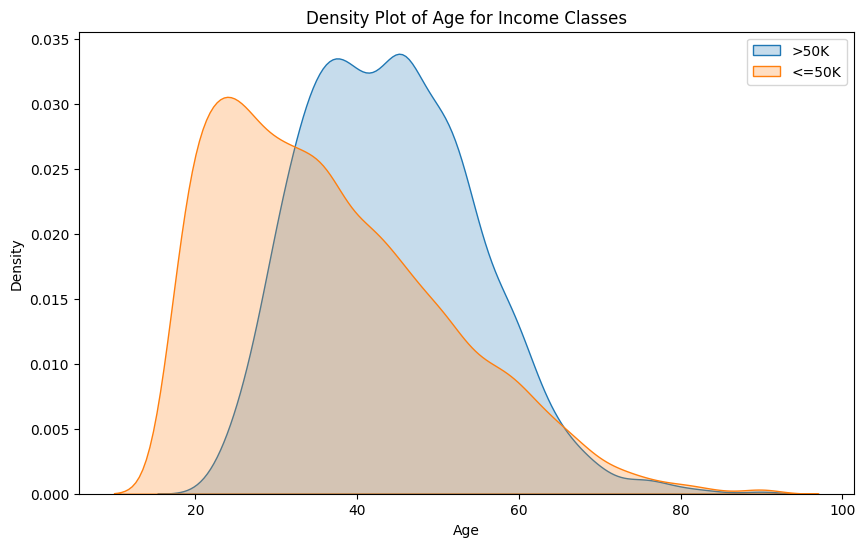

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(X_test[y_test == ' >50K', 0], label=">50K", fill=True)
sns.kdeplot(X_test[y_test == ' <=50K',0], label="<=50K", fill=True)
plt.title('Density Plot of Age for Income Classes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
